Mounting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Here we set the working folder, if you were to try to run this in your own google drive you would have to configure this working folder.

In [ ]:
working_folder = '/content/gdrive/MyDrive/462/ResearchProject/'

In [ ]:
import sys
sys.path.append(working_folder)

Loading in relevant libraries

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

%matplotlib inline

Loading in the different csvs from all the different models

In [ ]:
NDQNtrain = pd.read_csv(working_folder+'NDQN_train.csv')
NDQNtest = pd.read_csv(working_folder+'NDQN_test.csv')

NDQN_Duelingtrain = pd.read_csv(working_folder+'NDQN_Dueling_train.csv')
NDQN_Duelingtest = pd.read_csv(working_folder+'NDQN_Dueling_test.csv')

DDQNtrain = pd.read_csv(working_folder+'DDQN_train.csv')
DDQNtest = pd.read_csv(working_folder+'DDQN_test.csv')

DDQN_Duelingtrain = pd.read_csv(working_folder+'DDQN-Dueling_train.csv')
DDQN_Duelingtest = pd.read_csv(working_folder+'DDQN-Dueling_test.csv')

randomtrain = pd.read_csv(working_folder+'Random_test.csv')
randomtest = pd.read_csv(working_folder+'Random_test.csv')

# Putting all data frames in a list
train = [NDQNtrain, NDQN_Duelingtrain, DDQNtrain, DDQN_Duelingtrain, randomtrain]
test = [NDQNtest, NDQN_Duelingtest, DDQNtest, DDQN_Duelingtest, randomtest]

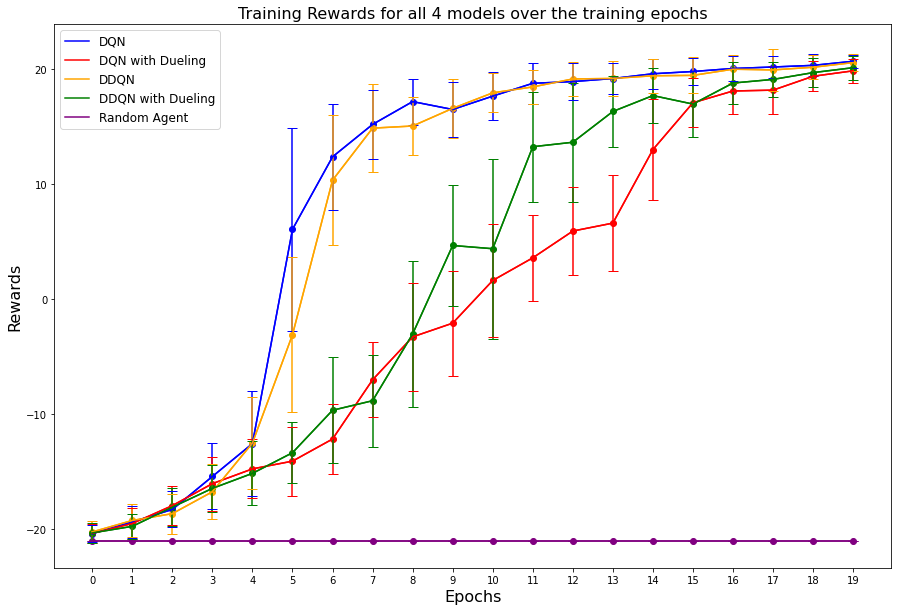

In [ ]:
train_means = []
train_stds = []
# Creating new lists of means and standard deviations for each epoch in the training
for t in train:
    train_means.append(t.groupby(['Episode'])['Reward'].mean().to_numpy())
    train_stds.append(t.groupby(['Episode'])['Reward'].std().to_numpy())

# Creating the plot with all the lines

x_axis = list(range(len(train_means[0])))

plt.figure(figsize=(15,10))

plt.plot(x_axis, train_means[0], color='blue', label='DQN')
plt.scatter(x_axis, train_means[0], color='blue')
plt.errorbar(x_axis, train_means[0], yerr=train_stds[0], color='blue', capsize=5)

plt.plot(x_axis, train_means[1], color='red', label='DQN with Dueling')
plt.scatter(x_axis, train_means[1], color='red')
plt.errorbar(x_axis, train_means[1], yerr=train_stds[1], color='red', capsize=5)

plt.plot(x_axis, train_means[2], color='orange', label='DDQN')
plt.scatter(x_axis, train_means[2], color='orange')
plt.errorbar(x_axis, train_means[2], yerr=train_stds[2], color='orange', capsize=5)

plt.plot(x_axis, train_means[3], color='green', label='DDQN with Dueling')
plt.scatter(x_axis, train_means[3], color='green')
plt.errorbar(x_axis, train_means[3], yerr=train_stds[3], color='green', capsize=5)

plt.plot(x_axis, train_means[4], color='purple', label='Random Agent')
plt.scatter(x_axis, train_means[4], color='purple')
plt.errorbar(x_axis, train_means[4], yerr=train_stds[4], color='purple', capsize=5)

plt.xticks(range(len(x_axis)), x_axis)
plt.legend(prop={'size': 12})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Rewards', fontsize=16)
plt.title('Training Rewards for all 4 models over the training epochs', fontsize=16)
plt.show()

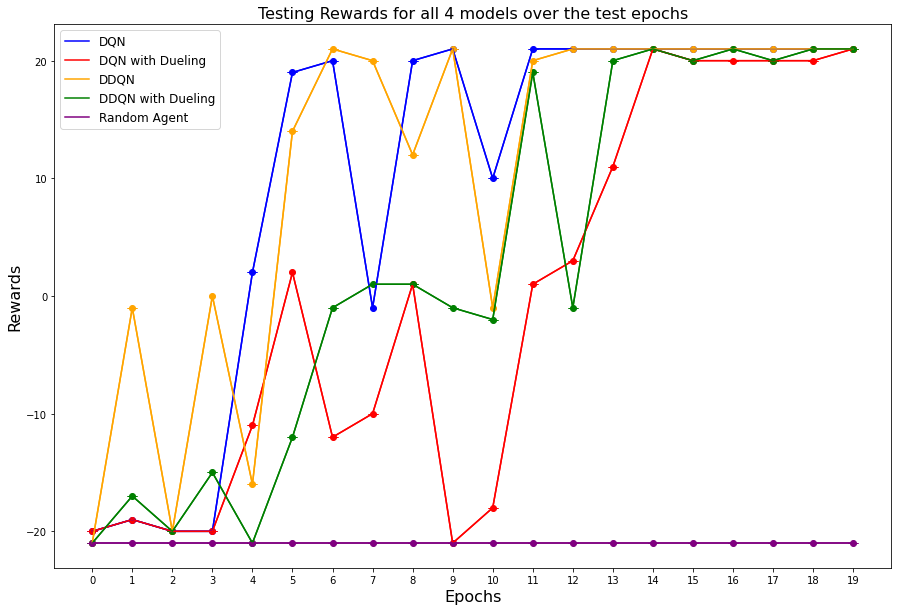

In [ ]:
test_means = []
test_stds = []
# Creating new lists of means and standard deviations for each epoch in the testing

for t in test:
    test_means.append(t.groupby(['Episode'])['Reward'].mean().to_numpy())
    test_stds.append(t.groupby(['Episode'])['Reward'].std().to_numpy())

# Creating the plot with all the lines

x_axis = list(range(len(test_means[0])))

plt.figure(figsize=(15,10))

plt.plot(x_axis, test_means[0], color='blue', label='DQN')
plt.scatter(x_axis, test_means[0], color='blue')
plt.errorbar(x_axis, test_means[0], yerr=test_stds[0], color='blue', capsize=5)

plt.plot(x_axis, test_means[1], color='red', label='DQN with Dueling')
plt.scatter(x_axis, test_means[1], color='red')
plt.errorbar(x_axis, test_means[1], yerr=test_stds[1], color='red', capsize=5)

plt.plot(x_axis, test_means[2], color='orange', label='DDQN')
plt.scatter(x_axis, test_means[2], color='orange')
plt.errorbar(x_axis, test_means[2], yerr=test_stds[2], color='orange', capsize=5)

plt.plot(x_axis, test_means[3], color='green', label='DDQN with Dueling')
plt.scatter(x_axis, test_means[3], color='green')
plt.errorbar(x_axis, test_means[3], yerr=test_stds[3], color='green', capsize=5)

plt.plot(x_axis, test_means[4], color='purple', label='Random Agent')
plt.scatter(x_axis, test_means[4], color='purple')
plt.errorbar(x_axis, test_means[4], yerr=test_stds[4], color='purple', capsize=5)

plt.xticks(range(len(x_axis)), x_axis)
plt.legend(prop={'size': 12})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Rewards', fontsize=16)
plt.title('Testing Rewards for all 4 models over the test epochs', fontsize=16)
plt.show()

# $p$-Values

In [ ]:
train_labels = ['NDQN','NDQN_Dueling','DDQN','DDQN_Dueling','Random']
count = 0
count2 = 0

# Loops to go through, comparing each model to each other, and calculating p-values for each epoch
for t in train:
    for t2 in train:
        print('{} vs {}'.format(train_labels[count], train_labels[count2]))
        for i in range(19):
            # Using ttest_ind to calculate the p-value for each epoch, for each model comparison
            print(ttest_ind(t[t['Episode']==i].to_numpy().tolist(), t2[t2['Episode']==i].to_numpy().tolist(), equal_var=False, axis=0))
        count2 += 1
        print('#########################################################')
    count2 = 0
    count += 1

[-18.0, -21.0, -21.0, -21.0, -21.0, -21.0, -21.0, -21.0, -21.0, -20.0, -21.0, -20.0, -21.0, -20.0, -21.0, -20.0, -21.0, -21.0, -20.0, -21.0, -21.0, -20.0, -20.0, -21.0, -19.0, -20.0, -21.0, -20.0, -21.0, -21.0, -20.0, -21.0, -21.0, -21.0, -20.0, -19.0, -21.0, -21.0, -21.0, -21.0, -20.0, -20.0, -21.0, -20.0, -21.0, -21.0, -21.0, -21.0, -21.0, -20.0, -21.0, -21.0, -21.0, -19.0, -21.0, -21.0, -20.0, -20.0, -21.0, -19.0, -21.0, -21.0, -20.0, -21.0, -21.0, -21.0, -18.0, -21.0, -20.0, -21.0, -21.0, -21.0, -21.0, -20.0, -21.0, -18.0, -21.0, -21.0, -21.0, -20.0, -21.0, -19.0, -20.0, -19.0, -21.0, -20.0, -21.0, -21.0, -20.0, -20.0, -19.0, -19.0, -20.0, -19.0, -20.0, -20.0, -20.0, -21.0, -21.0, -20.0, -21.0, -20.0, -20.0, -21.0, -20.0, -20.0, -21.0, -20.0, -21.0, -20.0, -20.0, -21.0, -21.0, -19.0, -20.0, -20.0, -20.0, -21.0, -21.0, -21.0, -21.0, -20.0, -21.0, -21.0, -21.0, -20.0, -21.0, -21.0, -20.0, -20.0, -21.0, -21.0, -19.0, -19.0, -20.0, -21.0, -21.0, -20.0, -20.0, -21.0, -21.0, -20.0, -21.0